In [21]:
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [22]:
import cv2
im = cv2.imread("lambo.jpeg", 0)
print(type(im))

<class 'numpy.ndarray'>


There are easier ways to do this, but implemented sobel edge detection with pytorch for practice

In [23]:
tensor = torch.from_numpy(im)

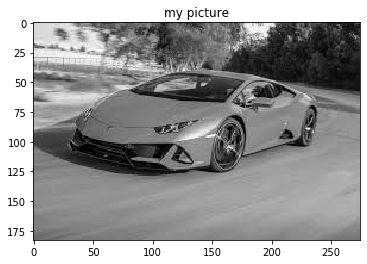

In [24]:
plt.imshow(im, cmap='gray', vmin=0, vmax=255)
plt.title('my picture')
plt.show()

In [25]:
print(tensor.dtype)
tensor = tensor.type(torch.float32)
print(tensor.dtype)

torch.uint8
torch.float32


In [28]:
nb_channels = 1
h, w = 3, 3
tensor = tensor.view([1,1, 183, 275])
x = torch.randn(1, nb_channels, h, w)
weights_x = torch.tensor([[1., 0., -1.],
                        [2., 0., -2.],
                        [1., 0., -1.]])
weights_y = torch.tensor([[1., 2., 1.],
                        [0., 0., 0.],
                        [-1., -2., -1.]])

weights_x = weights_x.view(1, 1, 3, 3).repeat(1, nb_channels, 1, 1)
weights_y = weights_y.view(1, 1, 3, 3).repeat(1, nb_channels, 1, 1)


output_x = F.conv2d(tensor, weights_x)
output_y = F.conv2d(tensor, weights_y)

output_x = output_x ** 2
output_y = output_y ** 2

output = output_x + output_y
output = output ** (1/2)

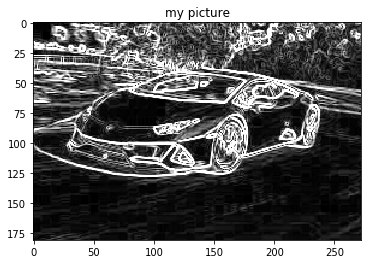

In [29]:
plt.imshow(output.view(181, 273), cmap='gray', vmin=0, vmax=255)
plt.title('my picture')
plt.show()